<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_5/5_1c_crosstab_pivot_pivottable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crosstabs and Pivot Tables


---



## Crosstab vs Pivot Table

In Pandas, crosstab and pivot_table are both functions that are used to create pivot tables, which are multi-dimensional aggregations of data. However, there are some key differences between the two functions.

- crosstab is a function that is specifically designed for creating pivot tables based on categorical data. It takes as input the values to be aggregated, the row index, and the column index, and returns a pivot table with the requested aggregation.
https://pbpython.com/pandas-crosstab.html

- pivot_table, on the other hand, is a more general-purpose function that can handle both categorical and numerical data. It has more options for specifying the aggregation and provides more flexibility in terms of the type of data that can be aggregated. In addition to the row and column indices, pivot_table also has options for specifying the values to be aggregated and the aggregation function.
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

### What to use when? 

Use a crosstab if you have categorical data and want to create a simple pivot table. If you have more complex requirements or a mixture of categorical and numerical data, pivot_table is a better choice.


In [7]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ------------------------------------------------------------------
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [8]:
nba = pd.read_csv("/content/drive/MyDrive/2022-MGT/nba.csv")
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.00,PG,25.00,6-2,180.00,Texas,7730337.00
1,Jae Crowder,Boston Celtics,99.00,SF,25.00,6-6,235.00,Marquette,6796117.00
2,John Holland,Boston Celtics,30.00,SG,27.00,6-5,205.00,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.00,SG,22.00,6-5,185.00,Georgia State,1148640.00
4,Jonas Jerebko,Boston Celtics,8.00,PF,29.00,6-10,231.00,NaN,5000000.00


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Deal with Misisng Salary


---

we'll fill the missing salary values in with the mean. 


In [10]:
nba['Salary'] = nba['Salary'].fillna(value=round(nba['Salary'].mean(),2), inplace=False)
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.00,PG,25.00,6-2,180.00,Texas,7730337.00
1,Jae Crowder,Boston Celtics,99.00,SF,25.00,6-6,235.00,Marquette,6796117.00
2,John Holland,Boston Celtics,30.00,SG,27.00,6-5,205.00,Boston University,4842684.11
3,R.J. Hunter,Boston Celtics,28.00,SG,22.00,6-5,185.00,Georgia State,1148640.00
4,Jonas Jerebko,Boston Celtics,8.00,PF,29.00,6-10,231.00,NaN,5000000.00


# Crosstab() Basics

The .crosstab() function takes two or more lists, pandas series or dataframe columns. It returns a frequency table of each combination by default.

```
pd.crosstab(index, 
columns, 
values=None, 
aggfunc=None, 
margins=False, 
margins_name='All')


```

- index: The variable to be used for the rows of the pivot table.
- columns: The variable to be used for the columns of the pivot table.
- values: The variable to be aggregated. If not specified, all values will be aggregated.
- aggfunc: The aggregation function to be applied to the values. By default, crosstab uses the count aggregation function.
- margins: A boolean value that determines whether row or column totals should be included in the pivot table.
- margins_name: The name to be used for the row or column totals when margins is set to True.

In [11]:
# -- basic -- 
pd.crosstab(index=nba['Team'], columns=nba['Position'])

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,3,4,2,2,4
Boston Celtics,3,3,4,1,4
Brooklyn Nets,2,4,3,0,6
Charlotte Hornets,3,3,3,1,5
Chicago Bulls,2,5,2,2,4
Cleveland Cavaliers,3,2,3,2,5
Dallas Mavericks,3,4,4,2,2
Denver Nuggets,3,2,3,3,4
Detroit Pistons,3,2,4,4,2


In [12]:
# -- normalized -- 
pd.crosstab(index=nba['Team'], columns=nba['Position'], normalize='index') 

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,0.20,0.27,0.13,0.13,0.27
Boston Celtics,0.20,0.20,0.27,0.07,0.27
Brooklyn Nets,0.13,0.27,0.20,0.00,0.40
Charlotte Hornets,0.20,0.20,0.20,0.07,0.33
Chicago Bulls,0.13,0.33,0.13,0.13,0.27
Cleveland Cavaliers,0.20,0.13,0.20,0.13,0.33
Dallas Mavericks,0.20,0.27,0.27,0.13,0.13
Denver Nuggets,0.20,0.13,0.20,0.20,0.27
Detroit Pistons,0.20,0.13,0.27,0.27,0.13


In [13]:
# -- margin totals -- 
pd.crosstab(index=nba['Team'], columns=nba['Position'],  margins=True)

Position,C,PF,PG,SF,SG,All
Team,,,,,,
Atlanta Hawks,3,4,2,2,4,15
Boston Celtics,3,3,4,1,4,15
Brooklyn Nets,2,4,3,0,6,15
Charlotte Hornets,3,3,3,1,5,15
Chicago Bulls,2,5,2,2,4,15
Cleveland Cavaliers,3,2,3,2,5,15
Dallas Mavericks,3,4,4,2,2,15
Denver Nuggets,3,2,3,3,4,15
Detroit Pistons,3,2,4,4,2,15


In [14]:
# -- normalized plut totals 
pd.crosstab(index=nba['Team'], columns=nba['Position'], normalize='index', margins=True)

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,0.20,0.27,0.13,0.13,0.27
Boston Celtics,0.20,0.20,0.27,0.07,0.27
Brooklyn Nets,0.13,0.27,0.20,0.00,0.40
Charlotte Hornets,0.20,0.20,0.20,0.07,0.33
Chicago Bulls,0.13,0.33,0.13,0.13,0.27
Cleveland Cavaliers,0.20,0.13,0.20,0.13,0.33
Dallas Mavericks,0.20,0.27,0.27,0.13,0.13
Denver Nuggets,0.20,0.13,0.20,0.20,0.27
Detroit Pistons,0.20,0.13,0.27,0.27,0.13


In [15]:
# -- take the mean instead of count -- 
pd.crosstab(index=nba['Team'], 
            columns=nba['Position'], 
            values=nba['Salary'], # what column 
            aggfunc='mean'        # what function to apply 
            )

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,7585416.67,5988067.00,4881700.00,3000000.00,2607758.00
Boston Celtics,2450465.00,6056986.67,4974651.50,6796117.00,2791668.53
Brooklyn Nets,10318138.00,3576204.75,2915758.67,NaN,1473350.67
Charlotte Hornets,6772240.00,4685770.00,4776151.67,6331404.00,4661406.20
Chicago Bulls,10424380.00,3361007.40,11171532.00,1958160.00,5717549.25
Cleveland Cavaliers,6828956.67,13941014.50,6551592.33,11958888.00,3977984.22
Dallas Mavericks,2332019.00,3052835.00,4418183.25,8231051.00,8928250.00
Denver Nuggets,1617239.67,7024977.50,3482413.33,9327590.33,1908232.28
Detroit Pistons,4090697.00,4000000.00,4260003.00,5173600.00,4580880.00


## Crosstab Visualization


---

Heatmaps are one of the most useful visualizations of a crosstab and pivot table. 


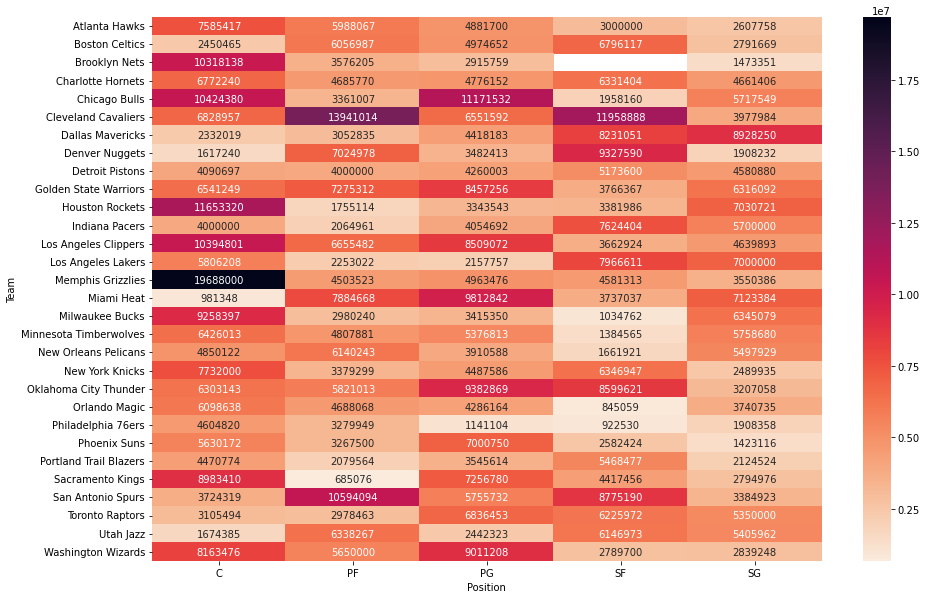

In [16]:
ctab = pd.crosstab(index=nba['Team'], columns=nba['Position'], values=nba['Salary'], aggfunc='mean').round(0)
plt.figure(figsize=(15,10))
sns.heatmap(ctab, cmap='rocket_r', annot=True,  fmt='.0f')
plt.show()

# Pivot Table


The pivot_table function in Pandas is used to create a pivot table from a dataframe. A pivot table is a multi-dimensional aggregation of data that summarizes and aggregates data based on one or more index variables (rows) and one or more column variables (columns).


```
pandas.pivot_table(
  data,
  values=None, 
  index=None, 
  columns=None, 
  aggfunc='mean',
  fill_value=None, 
  margins=False, 
  dropna=True, 
  margins_name='All', 
  observed=False)
```

- values: The variable to be aggregated. This can be one or more variables in the dataframe.
- index: The variable(s) to be used for the rows of the pivot table. This can be one or more variables in the dataframe.
columns: The variable(s) to be used for the columns of the pivot table. This can be one or more variables in the dataframe.
- aggfunc: The aggregation function to be applied to the values. This can be one of the built-in aggregation functions (e.g. sum, mean, count, etc.) or a custom aggregation function.
- fill_value: The value to be used to fill missing values in the pivot table.
margins: A boolean value that determines whether to include row or column totals in the pivot table.
- dropna: A boolean value that determines whether to drop missing values in the pivot table.

https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-ii-f8029a2b0c9b#d10e

In [17]:
# simple as it gets! 
pd.pivot_table(nba, 
               values='Salary', 
               index='Team', 
               aggfunc='mean')

,Salary
Team,
Atlanta Hawks,4860196.67
Boston Celtics,4225583.47
Brooklyn Nets,3501898.33
Charlotte Hornets,5222728.00
Chicago Bulls,5785558.53
Cleveland Cavaliers,7455424.87
Dallas Mavericks,4746582.13
Denver Nuggets,4330974.27
Detroit Pistons,4477884.20


In [18]:
# pass lots of aggreate functions 
pd.pivot_table(nba, 
               values='Salary', 
               index='Team', 
               aggfunc=['mean', 'count', 'min', 'max'])

,mean,count,min,max
,Salary,Salary,Salary,Salary
Team,,,,
Atlanta Hawks,4860196.67,15,525093.00,18671659.00
Boston Celtics,4225583.47,15,1148640.00,12000000.00
Brooklyn Nets,3501898.33,15,134215.00,19689000.00
Charlotte Hornets,5222728.00,15,189455.00,13500000.00
Chicago Bulls,5785558.53,15,525093.00,20093064.00
Cleveland Cavaliers,7455424.87,15,111196.00,22970500.00
Dallas Mavericks,4746582.13,15,525093.00,16407500.00
Denver Nuggets,4330974.27,15,258489.00,14000000.00


In [19]:
pd.pivot_table(nba, 
               values='Salary', 
               index='Team',
               columns='Position', 
               aggfunc=['mean', 'count'])

mean                                      \
Position                         C          PF          PG          SF   
Team                                                                     
Atlanta Hawks           7585416.67  5988067.00  4881700.00  3000000.00   
Boston Celtics          2450465.00  6056986.67  4974651.50  6796117.00   
Brooklyn Nets          10318138.00  3576204.75  2915758.67         NaN   
Charlotte Hornets       6772240.00  4685770.00  4776151.67  6331404.00   
Chicago Bulls          10424380.00  3361007.40 11171532.00  1958160.00   
Cleveland Cavaliers     6828956.67 13941014.50  6551592.33 11958888.00   
Dallas Mavericks        2332019.00  3052835.00  4418183.25  8231051.00   
Denver Nuggets          1617239.67  7024977.50  3482413.33  9327590.33   
Detroit Pistons         4090697.00  4000000.00  4260003.00  5173600.00   
Golden State Warriors   6541249.33  7275312.50  8457255.50  3766367.40   
Houston Rockets        11653320.00  1755113.75  3343543.00  3381985.67   
Indiana Pacers          4000000.00  2064961.25  4054692.50  7624403.67   
Los Angeles Clippers   10394801.00  6655482.00  8509072.33  3662923.75   
Los Angeles Lakers      5806208.00  2253022.50  2157757.33  7966611.25   
Memphis Grizzlies      19688000.00  4503523.02  4963476.07  4581313.33   
Miami Heat               981348.00  7884667.75  9812842.05  3737037.22   
Milwaukee Bucks         9258397.00  2980240.00  3415350.00  1034762.33   
Minnesota Timberwolves  6426013.33  4807881.28  5376813.33  1384565.33   
New Orleans Pelicans    4850122.00  6140243.33  3910587.75  1661921.00   
New York Knicks         7732000.00  3379299.00  4487586.00  6346947.25   
Oklahoma City Thunder   6303142.67  5821013.33  9382869.00  8599620.67   
Orlando Magic           6098638.00  4688068.25  4286164.25   845059.00   
Philadelphia 76ers      4604820.00  3279949.22  1141104.25   922529.50   
Phoenix Suns            5630172.33  3267500.00  7000749.50  2582424.00   
Portland Trail Blazers  4470774.00  2079564.33  3545613.50  5468477.00   
Sacramento Kings        8983410.00   685076.00  7256779.50  4417455.50   
San Antonio Spurs       3724319.00 10594093.50  5755732.33  8775190.00   
Toronto Raptors         3105494.00  2978463.00  6836453.33  6225972.33   
Utah Jazz               1674385.33  6338266.67  2442323.25  6146972.67   
Washington Wizards      8163476.33  5650000.00  9011207.50  2789700.00   

                                  count                      
Position                       SG     C   PF   PG   SF   SG  
Team                                                         
Atlanta Hawks          2607758.00  3.00 4.00 2.00 2.00 4.00  
Boston Celtics         2791668.53  3.00 3.00 4.00 1.00 4.00  
Brooklyn Nets          1473350.67  2.00 4.00 3.00  NaN 6.00  
Charlotte Hornets      4661406.20  3.00 3.00 3.00 1.00 5.00  
Chicago Bulls          5717549.25  2.00 5.00 2.00 2.00 4.00  
Cleveland Cavaliers    3977984.22  3.00 2.00 3.00 2.00 5.00  
Dallas Mavericks       8928250.00  3.00 4.00 4.00 2.00 2.00  
Denver Nuggets         1908232.28  3.00 2.00 3.00 3.00 4.00  
Detroit Pistons        4580880.00  3.00 2.00 4.00 4.00 2.00  
Golden State Warriors  6316092.00  3.00 2.00 2.00 5.00 3.00  
Houston Rockets        7030720.75  2.00 4.00 2.00 3.00 4.00  
Indiana Pacers         5700000.00  2.00 4.00 4.00 3.00 2.00  
Los Angeles Clippers   4639893.33  2.00 3.00 3.00 4.00 3.00  
Los Angeles Lakers     7000000.00  3.00 4.00 3.00 4.00 1.00  
Memphis Grizzlies      3550386.00  1.00 6.00 5.00 3.00 3.00  
Miami Heat             7123384.00  1.00 4.00 2.00 5.00 3.00  
Milwaukee Bucks        6345079.00  2.00 3.00 4.00 3.00 4.00  
Minnesota Timberwolves 5758680.00  3.00 4.00 3.00 3.00 1.00  
New Orleans Pelicans   5497928.60  3.00 3.00 4.00 4.00 5.00  
New York Knicks        2489935.25  2.00 4.00 2.00 4.00 4.00  
Oklahoma City Thunder  3207057.50  3.00 3.00 2.00 3.00 4.00  
Orlando Magic          3740735.00  2.00 4.00 4.00 1.00 3.00  
Philadelphia 76ers     1908358.00  2.

# Pivot 


---


The `.pivot()` method in Pandas is used to pivot or reshape a dataframe by transforming one or more columns into index variables (rows) and one or more columns into column variables (columns). It creates a new, reshaped dataframe with the columns specified in index as the new index and the columns specified in columns as the new columns. The values in the new dataframe are taken from the values specified in values.

The basic syntax for using the pivot method is as follows:

```python
df.pivot(
  index=None,
  columns=None, 
  values=None)
```

Here's a simple example. 
```python
import pandas as pd

# Create a sample dataframe
data = {'fruit': ['apple', 'banana', 'banana', 'apple', 'apple'],
        'color': ['red', 'yellow', 'yellow', 'green', 'red'],
        'count': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Pivot the dataframe
df.pivot(index='fruit', columns='color', values='count')

```




In [21]:
nba.groupby(['Team', 'Position'])[['Salary']].agg('mean')

Salary
Team               Position           
Atlanta Hawks      C        7585416.67
                   PF       5988067.00
                   PG       4881700.00
                   SF       3000000.00
                   SG       2607758.00
...                                ...
Washington Wizards C        8163476.33
                   PF       5650000.00
                   PG       9011207.50
                   SF       2789700.00
                   SG       2839248.00

[149 rows x 1 columns]

In [22]:
res1 = nba.groupby(['Team', 'Position'])[['Salary']].agg(['mean', 'count']).stack().reset_index()
res1

,Team,Position,level_2,Salary
0,Atlanta Hawks,C,mean,7585416.67
1,Atlanta Hawks,C,count,3.00
2,Atlanta Hawks,PF,mean,5988067.00
3,Atlanta Hawks,PF,count,4.00
4,Atlanta Hawks,PG,mean,4881700.00
...,...,...,...,...
293,Washington Wizards,PG,count,2.00
294,Washington Wizards,SF,mean,2789700.00
295,Washington Wizards,SF,count,4.00
296,Washington Wizards,SG,mean,2839248.00


In [23]:
res1.pivot(index='Team', columns=['Position', 'level_2'], values=['Salary'])

Salary                                            \
Position                         C                PF                PG         
level_2                       mean count        mean count        mean count   
Team                                                                           
Atlanta Hawks           7585416.67  3.00  5988067.00  4.00  4881700.00  2.00   
Boston Celtics          2450465.00  3.00  6056986.67  3.00  4974651.50  4.00   
Brooklyn Nets          10318138.00  2.00  3576204.75  4.00  2915758.67  3.00   
Charlotte Hornets       6772240.00  3.00  4685770.00  3.00  4776151.67  3.00   
Chicago Bulls          10424380.00  2.00  3361007.40  5.00 11171532.00  2.00   
Cleveland Cavaliers     6828956.67  3.00 13941014.50  2.00  6551592.33  3.00   
Dallas Mavericks        2332019.00  3.00  3052835.00  4.00  4418183.25  4.00   
Denver Nuggets          1617239.67  3.00  7024977.50  2.00  3482413.33  3.00   
Detroit Pistons         4090697.00  3.00  4000000.00  2.00  4260003.00  4.00   
Golden State Warriors   6541249.33  3.00  7275312.50  2.00  8457255.50  2.00   
Houston Rockets        11653320.00  2.00  1755113.75  4.00  3343543.00  2.00   
Indiana Pacers          4000000.00  2.00  2064961.25  4.00  4054692.50  4.00   
Los Angeles Clippers   10394801.00  2.00  6655482.00  3.00  8509072.33  3.00   
Los Angeles Lakers      5806208.00  3.00  2253022.50  4.00  2157757.33  3.00   
Memphis Grizzlies      19688000.00  1.00  4503523.02  6.00  4963476.07  5.00   
Miami Heat               981348.00  1.00  7884667.75  4.00  9812842.05  2.00   
Milwaukee Bucks         9258397.00  2.00  2980240.00  3.00  3415350.00  4.00   
Minnesota Timberwolves  6426013.33  3.00  4807881.28  4.00  5376813.33  3.00   
New Orleans Pelicans    4850122.00  3.00  6140243.33  3.00  3910587.75  4.00   
New York Knicks         7732000.00  2.00  3379299.00  4.00  4487586.00  2.00   
Oklahoma City Thunder   6303142.67  3.00  5821013.33  3.00  9382869.00  2.00   
Orlando Magic           6098638.00  2.00  4688068.25  4.00  4286164.25  4.00   
Philadelphia 76ers      4604820.00  2.00  3279949.22  5.00  1141104.25  4.00   
Phoenix Suns            5630172.33  3.00  3267500.00  2.00  7000749.50  4.00   
Portland Trail Blazers  4470774.00  3.00  2079564.33  3.00  3545613.50  2.00   
Sacramento Kings        8983410.00  3.00   685076.00  2.00  7256779.50  2.00   
San Antonio Spurs       3724319.00  4.00 10594093.50  2.00  5755732.33  3.00   
Toronto Raptors         3105494.00  3.00  2978463.00  4.00  6836453.33  3.00   
Utah Jazz               1674385.33  3.00  6338266.67  3.00  2442323.25  4.00   
Washington Wizards      8163476.33  3.00  5650000.00  2.00  9011207.50  2.00   

                                                           
Position                        SF               SG        
level_2                       mean count       mean count  
Team                                                       
Atlanta Hawks           3000000.00  2.00 2607758.00  4.00  
Boston Celtics          6796117.00  1.00 2791668.53  4.00  
Brooklyn Nets                  NaN   NaN 1473350.67  6.00  
Charlotte Hornets       6331404.00  1.00 4661406.20  5.00  
Chicago Bulls           1958160.00  2.00 5717549.25  4.00  
Cleveland Cavaliers    11958888.00  2.00 3977984.22  5.00  
Dallas Mavericks        8231051.00  2.00 8928250.00  2.00  
Denver Nuggets          9327590.33  3.00 1908232.28  4.00  
Detroit Pistons         5173600.00  4.00 4580880.00  2.00  
Golden State Warriors   3766367.40  5.00 6316092.00  3.00  
Houston Rockets         3381985.67  3.00 7030720.75  4.00  
Indiana Pacers          7624403.67  3.00 5700000.00  2.00  
Los Angeles Clippers    3662923.75  4.00 4639893.33  3.00  
Los Angeles Lakers      7966611.25  4.00 7000000.00  1.00  
Memphis Grizzlies       4581313.33  3.00 3550386.00  3.00  
Miami Heat              3737037.22  5.00 7123384.00  3.00  
Milwaukee Bucks         1034762.33  3.00 6345079.00  4.00  
Minnesota Timberwolves  1384565.33  3.00 575868